In [537]:
#from sklearn.utils import shuffle
#from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import train_test_split
from keras import backend as K
#K.set_image_dim_ordering('th')

#from keras.backend.image_data_format()
#keras.backend.set_image_data_format('th')
K.image_data_format()

'channels_last'

In [538]:
#from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import SGD,RMSprop,adam

MatheMatical Expression Modelling

In [539]:
#conda install keras

In [540]:
# Import libraries
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import keras
import tensorflow as tf
from tensorflow import keras

In [541]:
#Rename the images in our dataset folder
#preprocessing
import os
def rename_multiple_files(path,obj):
    i=0
    for filename in os.listdir(path):
        try:
            f,extension = os.path.splitext(path+filename)
            src=path+filename
            dst=path+obj+str(i)+extension
            os.rename(src,dst)
            i+=1
            print('Rename successful.')
        except:
            i+=1

In [542]:
# Define data path
PATH = os.getcwd()
PATH
data_path = PATH + '\\Main\\math\\'
obj="math"
#rename mathematical images
rename_multiple_files(data_path,obj)

#rename non-mathematical images
data_path1 = PATH + '\\Main\\nonmath\\'
obj1="nonmath"
rename_multiple_files(data_path1,obj1)

Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename successful.
Rename succe

In [543]:
# Define data path and folder names
data_path = PATH + '\\Main\\'
data_path
data_dir_list_math = os.listdir(data_path)
data_dir_list_math

['math', 'nonmath']

In [544]:
import shutil
resizePath=PATH + '\\Resize\\'
if os.path.exists(resizePath):
        shutil.rmtree(resizePath)
os.mkdir(resizePath)

In [545]:
#Create the image and label list
img_rows=128
img_cols=128
num_channel=1
num_epoch=20

# Define the number of classes
#num_classes = 4

labels_name={'math':0,'nonmath':1}

img_data_list=[]
labels_list = []

for dataset in data_dir_list_math:
    os.mkdir(resizePath+"\\"+dataset)
    img_list=os.listdir(data_path+'\\'+ dataset)
    print ('Loading the images of dataset-'+'{}\n'.format(dataset))
    label = labels_name[dataset]
    print(label)
    for img in img_list:
        resizePathnew=resizePath+"\\"+dataset+"\\"+img
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        #input_img_flatten=cv2.resize(input_img,(128,128)).flatten()
        cv2.imwrite(resizePathnew,input_img_resize)
        img_data_list.append(input_img_resize)
        labels_list.append(label)

Loading the images of dataset-math

0
Loading the images of dataset-nonmath

1


In [546]:
#check the size of the label list
len(labels_list)

173

In [547]:
#check the shape image from imagelist
img_data = np.array(img_data_list)
print (img_data.shape)

(173, 128, 128)


(-0.5, 127.5, 127.5, -0.5)

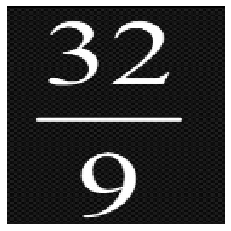

In [548]:
#plot a image from image list
some_math=img_data_list[16]
plt.imshow(some_math,cmap="binary")
plt.axis('off')

In [549]:
#Convert the image to array
img_data = np.array(img_data_list)
#Convert the image to float
img_data = img_data.astype('float32')
#normalize the image
img_data /= 255
print (img_data.shape)

(173, 128, 128)


In [550]:
#check the first image
img_data[0][0]

array([0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91,
       0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91,
       0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91,
       0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91,
       0.91, 0.91, 0.94, 0.89, 0.91, 0.9 , 0.92, 0.93, 0.89, 0.93, 0.88,
       0.92, 0.88, 0.88, 0.94, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91,
       0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91,
       0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91,
       0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91,
       0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91,
       0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91,
       0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91], dtype=float32)

In [551]:
#convert the label list to array
labels = np.array(labels_list)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [552]:
labels=labels.astype(np.uint8)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [553]:
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
#Y =keras.utils.to_categorical(labels,num_classes=None)
Y=labels
Y

(array([0, 1], dtype=uint8), array([84, 89], dtype=int64))


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [554]:
Y[16]

0

In [555]:
img_data= np.expand_dims(img_data, axis=3) 
print (img_data.shape)

(173, 128, 128, 1)


In [556]:
#Shuffle the dataset
from sklearn.utils import shuffle
x,y = shuffle(img_data,Y, random_state=2)
print(y[0])

0


In [557]:
#print the shape of Y 
y.shape

(173,)

In [558]:
# Split the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [559]:
#check the shape of y train
y_train[0]

1

In [560]:
#check the shape of  x train
X_train[0].shape

(128, 128, 1)

In [561]:
#check the shape of train and test datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(138, 128, 128, 1) (35, 128, 128, 1) (138,) (35,)


In [562]:
#plot a random tain image
some_math=X_train[0][0:]
some_math.shape
#plt.imshow(some_math,cmap="binary")

(128, 128, 1)

In [563]:
img_data.shape

(173, 128, 128, 1)

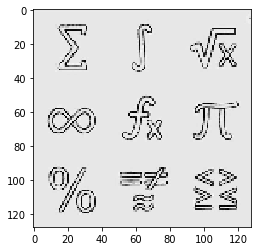

In [564]:
train_data = np.reshape(X_train[0],(128, 128))
train_data.shape
plt.imshow(train_data,cmap="binary")

In [565]:
img_data[0]

array([[[0.91],
        [0.91],
        [0.91],
        ...,
        [0.91],
        [0.91],
        [0.91]],

       [[0.91],
        [0.91],
        [0.91],
        ...,
        [0.91],
        [0.91],
        [0.91]],

       [[0.91],
        [0.91],
        [0.91],
        ...,
        [0.91],
        [0.91],
        [0.91]],

       ...,

       [[0.91],
        [0.91],
        [0.91],
        ...,
        [0.91],
        [0.91],
        [0.91]],

       [[0.91],
        [0.91],
        [0.91],
        ...,
        [0.91],
        [0.91],
        [0.91]],

       [[0.91],
        [0.91],
        [0.91],
        ...,
        [0.91],
        [0.91],
        [0.91]]], dtype=float32)

In [566]:
input_shape=img_data.shape
input_shape

(173, 128, 128, 1)

In [515]:
#num_classes=2  
##Original One
from keras.layers import Conv2D 
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',input_shape=[128,128,1], activation ='relu'))
#model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=3,activation ='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2,strides= 2,padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=3, activation ='relu'))
#model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2,strides= 2,padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=64,activation ='relu'))
#model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation ='softmax'))
#model.add(Activation('softmax'))

In [35]:
#num_classes=2
from keras.layers import Conv2D 
model = Sequential()

model.add(Conv2D(filters=6,kernel_size=3,padding='same',input_shape=[128,128,1], activation ='relu',))
#model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=3,activation ='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2,strides= 2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=3, activation ='relu'))
#model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2,strides= 2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=64,activation ='relu'))
#model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation ='softmax'))
#model.add(Activation('softmax'))

In [567]:
# C1 Convolutional Layer
from keras.layers import Conv2D 
from keras import models, layers
from keras.layers import AveragePooling2D
model = Sequential()

#Initializations:
xavier = keras.initializers.glorot_normal(seed=None)
#glorot_normal(seed=None)

model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(128,128,1), padding='same'))
# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
# C3 Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
# C5 Fully Connected Convolutional Layer
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(MaxPooling2D(pool_size=(2,2),strides= 2,padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
# FC6 Fully Connected Layer
model.add(Dense(84, activation='tanh'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
#Output Layer with softmax activation
model.add(Dense(1, activation='sigmoid'))
# Compile the model
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=’SGD’, metrics=[“accuracy”])

In [568]:
#model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=["accuracy"])
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=["accuracy"])

In [569]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 128, 128, 6)       156       
_________________________________________________________________
average_pooling2d_39 (Averag (None, 127, 127, 6)       0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 123, 123, 16)      2416      
_________________________________________________________________
average_pooling2d_40 (Averag (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 57, 57, 120)       48120     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 120)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 28, 120)     

True

In [570]:
hist = model.fit(X_train, y_train, batch_size=16, epochs=30, verbose=1, validation_data=(X_test, y_test))

Train on 138 samples, validate on 35 samples
Epoch 1/30
138/138 [==============================] - 5s 40ms/step - loss: 0.7018 - accuracy: 0.5507 - val_loss: 0.6122 - val_accuracy: 0.7143
Epoch 2/30
138/138 [==============================] - 4s 27ms/step - loss: 0.7128 - accuracy: 0.5072 - val_loss: 0.7816 - val_accuracy: 0.2857
Epoch 3/30
138/138 [==============================] - 4s 27ms/step - loss: 0.6918 - accuracy: 0.5217 - val_loss: 0.8623 - val_accuracy: 0.2857
Epoch 4/30
138/138 [==============================] - 4s 28ms/step - loss: 0.7013 - accuracy: 0.5217 - val_loss: 0.6741 - val_accuracy: 0.7143
Epoch 5/30
138/138 [==============================] - 4s 29ms/step - loss: 0.6862 - accuracy: 0.5942 - val_loss: 0.6815 - val_accuracy: 0.7429
Epoch 6/30
138/138 [==============================] - 4s 29ms/step - loss: 0.6815 - accuracy: 0.5797 - val_loss: 0.7219 - val_accuracy: 0.3143
Epoch 7/30
138/138 [==============================] - 4s 29ms/step - loss: 0.6753 - accuracy: 0.6

***Evaluating the model***

In [571]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[8:9]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[8:9])

Test Loss: 0.3538403902735029
Test accuracy: 0.9142857193946838
(1, 128, 128, 1)
[[0.68]]
[[1]]
[1]


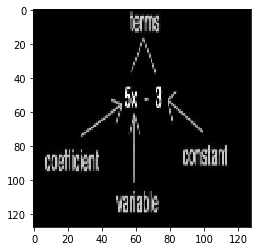

In [572]:
train_data = np.reshape(X_test[8:9],(128, 128))
train_data.shape
plt.imshow(train_data,cmap="binary")

In [573]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

***Testing the model with a new image***

In [574]:
# Testing a new math image 
predictPathmath=PATH + '\\predict\\math\\'
test_image = cv2.imread(predictPathmath+'\\math.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
#cv2.imwrite('C:\Users\mrudh\Desktop\Python\ProjectTry\MathRecognitionProject\Main\Resize\NonMathnew.jpeg',test_image)
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

(128, 128)


In [575]:
img_data= np.expand_dims(test_image, axis=2) 
print (img_data.shape)

(128, 128, 1)


In [576]:
img_data= np.expand_dims(img_data, axis=0)
print (img_data.shape)

(1, 128, 128, 1)


In [577]:
print((model.predict(img_data)))
print(model.predict_classes(img_data))

[[0.3]]
[[0]]


In [578]:
# Testing a new non math image 
predictPathnonmath=PATH + '\\predict\\nonmath\\'
test_image = cv2.imread(predictPathnonmath+'\\nonmath.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
#cv2.imwrite('C:\Users\mrudh\Desktop\Python\ProjectTry\MathRecognitionProject\Main\Resize\NonMathnew.jpeg',test_image)
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

(128, 128)


In [579]:
img_data= np.expand_dims(test_image, axis=2) 
print (img_data.shape)

(128, 128, 1)


In [580]:
img_data= np.expand_dims(img_data, axis=0)
print (img_data.shape)

(1, 128, 128, 1)


In [581]:
print((model.predict(img_data)))
print(model.predict_classes(img_data))

[[0.87]]
[[1]]


In [582]:
#%%
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred[0])
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred[0])
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['math', 'nonmath']
print(classification_report(y_test, Y_pred.round(),target_names=target_names))



[0.12]
              precision    recall  f1-score   support

        math       1.00      0.88      0.94        25
     nonmath       0.77      1.00      0.87        10

    accuracy                           0.91        35
   macro avg       0.88      0.94      0.90        35
weighted avg       0.93      0.91      0.92        35



In [583]:
print(confusion_matrix(y_test, Y_pred.round()))

[[22  3]
 [ 0 10]]


In [598]:
print(y_test)
print(Y_pred.round().ravel())

[0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0]
[0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.]


In [592]:
print(y_test[6:7])
print(Y_pred[6:7])
print(y_test!=Y_pred.round().ravel())

[0]
[[0.7]]
[False False False False  True False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False]


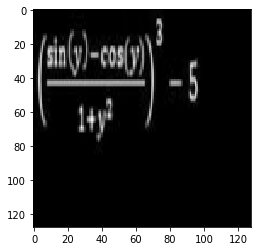

In [588]:
train_data = np.reshape(X_test[6:7],(128, 128))
train_data.shape
plt.imshow(train_data,cmap="binary")

In [586]:

# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[22  3]
 [ 0 10]]


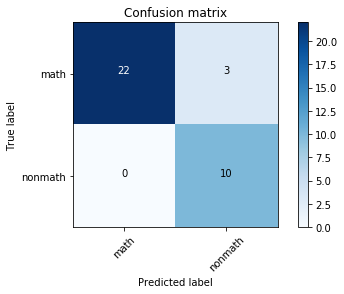

In [587]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(y_test, Y_pred.round()))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()